### TLL SAXS - Analysis -

    - epsHH_kT = 0.537 and eps_kT = 0.005

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from cycler import cycler
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from scipy import stats
from math import sqrt
from os import path
plt.rcParams.update({'font.size': 18, 'figure.figsize': [12.0, 8.0]})
display(HTML(data="""
<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 100%; }
    div#maintoolbar-container { width: 100%; }
</style>
"""))

#Working directory
try:
    workdir
except NameError:
    workdir=%pwd
else:
    %cd -q $workdir

%cd $workdir/

/Users/mikael/github/SI-Lipase-Structure-Factors/manybody/swap


## Energy checking

Plots the system energy in function of the simulation steps

/Users/mikael/github/SI-Lipase-Structure-Factors/manybody/swap


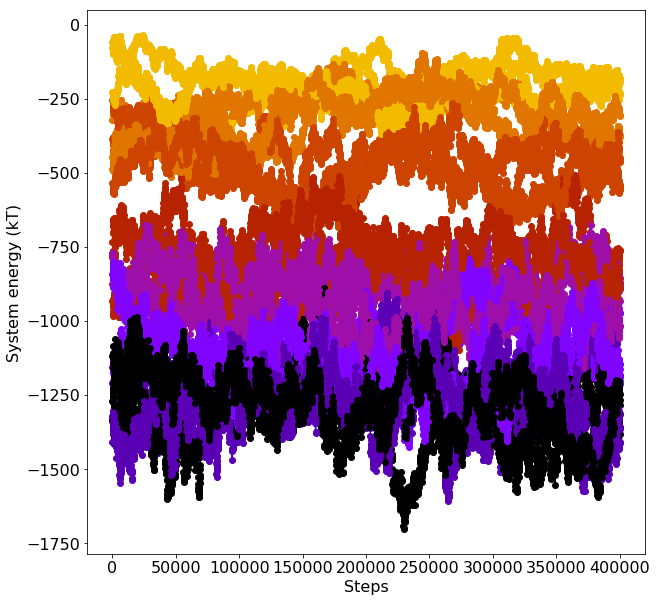

In [3]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
%cd $workdir/

Mw = 29609.61
conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
epsHH_kT = 0.537
eps_kT = 0.005

for epsHH_kT in [epsHH_kT]: 
    for eps_kT in [eps_kT]:
        for mod in [0,1,2]:
            for Cp in conc_range:
                pfx = 'series2-close_open-h{}-e{}-C{}-dp{}'.format(epsHH_kT, eps_kT, Cp, mod)
                %cd -q $pfx
                t,e = np.loadtxt("energy.dat",usecols=(0,1),unpack=True)
                plt.plot(t, e, 'o-', label=str(Cp)+' g/L')
                plt.xlabel("Steps")
                plt.ylabel("System energy (kT)")
                #if mod == 0:
                #    plt.legend()
                %cd -q '..'
        
#plt.savefig('energy_'+str(epsHH_kT)+'-e'+str(eps_kT)+'.png', bbox_inches='tight')        
plt.show()

## Plot S(q)

/Users/mikael/github/SI-Lipase-Structure-Factors/manybody/swap


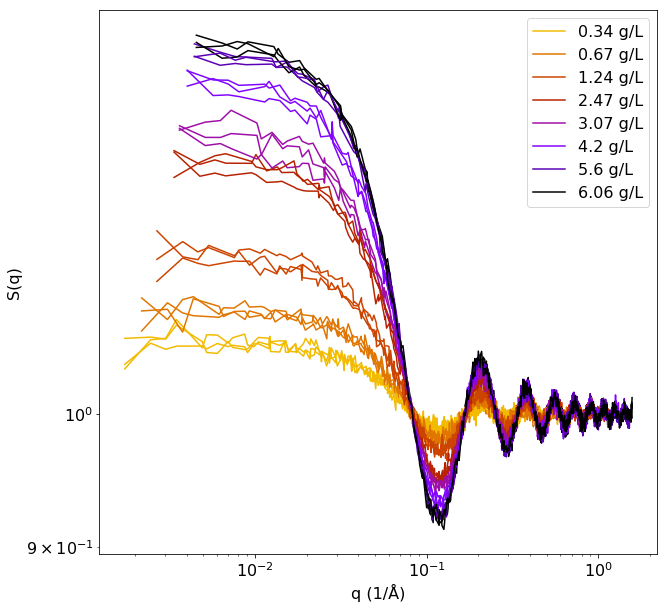

In [4]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
%cd $workdir/
conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
epsHH_kT = 0.537
eps_kT = 0.005

for epsHH_kT in [epsHH_kT]: 
    for eps_kT in [eps_kT]:
        for mod in [0,1,2]:
            for Cp in conc_range:
                pfx = 'series2-close_open-h{}-e{}-C{}-dp{}'.format(epsHH_kT, eps_kT, Cp, mod)
                %cd -q $pfx
                q,s = np.loadtxt("debye.dat",usecols=(0,1),unpack=True)
                plt.plot(q,s,ls='-',label=str(Cp)+' g/L')
                plt.xlabel("q (1/Å)")
                plt.ylabel("S(q)")
                plt.xscale('log')
                plt.yscale('log')
                if mod == 0:
                    #print(mod)
                    plt.legend()
                %cd -q '..'
#plt.savefig('sq-'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 
%cd -q $workdir

/home/marpoli/Work/2_TLL/Many-body


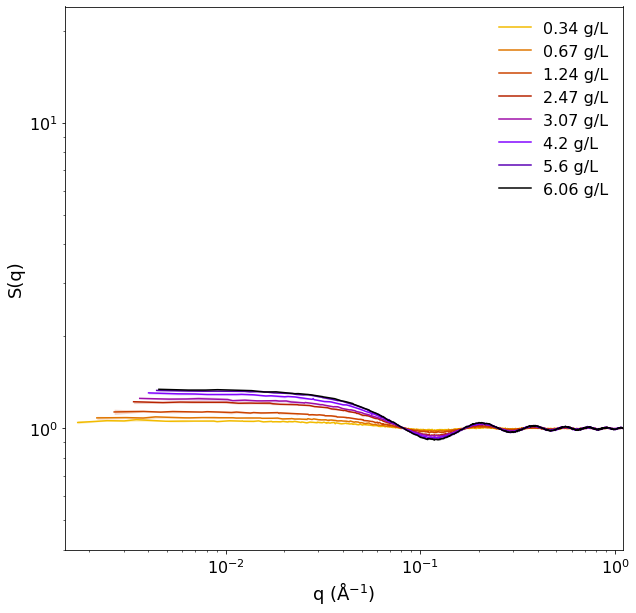

In [5]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
%cd $workdir/
serie = "series2"
conf = "close_open"
epslj = 0.005
epshh = 0.537

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
    elif C == 0.67:
        col = '#e07600'
    elif C == 1.24:
        col = '#cc4400'
    elif C == 2.47:
        col = '#b72300'
    elif C == 3.07:
        col = '#9e0ea9'
    elif C == 4.2:
        col = '#8104ff'
    elif C == 5.6:
        col = '#5a01b5'
    elif C == 6.06:
        col='black'

    nriter = 0
    smoy = [0] * 600
    qmoy = [0] * 600
    smax = [0] * 600
    smin = [1000] * 600
    for dp in [0,1,2]:
        pfx = str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+"-dp"+str(dp)
        %cd -q $pfx
        if path.exists("debye.dat"):
            q,s = np.loadtxt("debye.dat", unpack=True)
            nriter = nriter + 1   
            for i in np.arange(0,len(q),1):
                qmoy[i] = q[i]
                smoy[i] = smoy[i] + s[i]
                if smax[i] < s[i]:
                    smax[i] = s[i]
                if smin[i] > s[i]:
                    smin[i] = s[i]                    
        else:
            print("File missing in:", pfx)    # Say if there is a missing file (the averaging will be performed without it)
        %cd -q '..' 
 
    for i in np.arange(0,len(q),1):
        smoy[i] = smoy[i]/nriter

    plt.plot(qmoy,smoy,color=col,label=str(C)+" g/L")
    plt.fill_between(qmoy,smin,smax,interpolate=True, color=col, alpha=0.2, lw=0)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.4,24)
    plt.xlim(0.0015,1.1)
    plt.xlabel("q ("r'${\rm{\AA}^{-1}}$'")", fontsize=18)
    plt.ylabel("S(q)", fontsize=18)
    plt.legend(frameon=False, loc=1)
    np.savetxt(str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+'_moy.dat',np.transpose((qmoy,smoy)))  # For later (B2) 
plt.savefig('Sq_eps2.png')

## Plot radial distribution function - g(r)

/home/marpoli/Work/2_TLL/Many-body


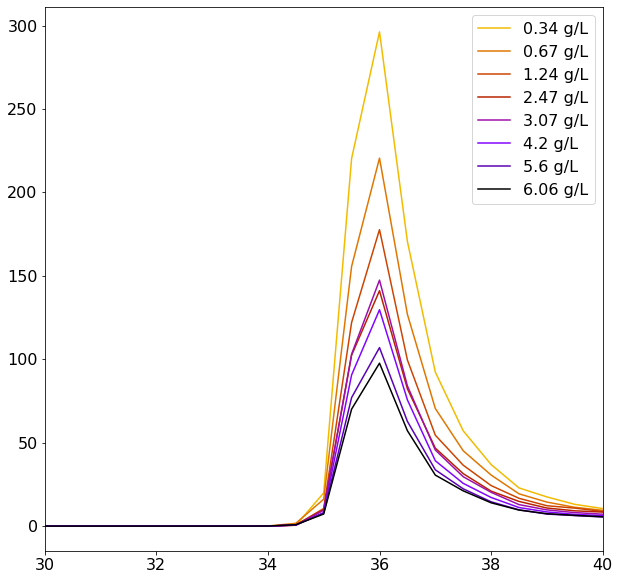

In [6]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
%cd $workdir/

conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 

epsHH_kT = 0.537
eps_kT = 0.005

for epsHH_kT in [epsHH_kT]: 
    for eps_kT in [eps_kT]:
        for Cp in conc_range:
            pfx = str('series2')+'-'+str('close_open')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
            %cd -q $pfx
            r,g = np.loadtxt("rdf.dat",usecols=(0,1),unpack=True)
            plt.plot(r,g,label=str(Cp)+' g/L')
            plt.xlim(30,40)
            plt.legend()
                        
            %cd -q '..'  
#plt.savefig('gr-'+str(series)+'-'+str('close_open')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 
%cd -q $workdir

## Regression on simulation S(q) in order to get S(0)

/home/marpoli/Work/2_TLL/Many-body


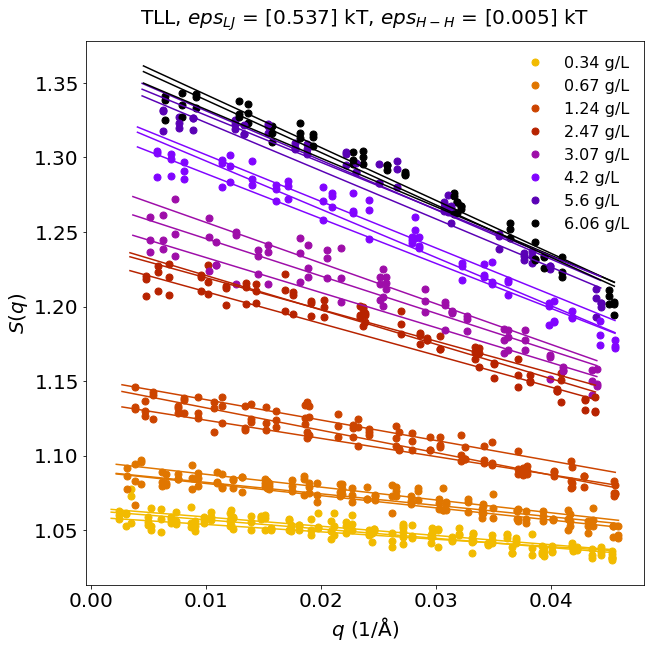

In [7]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))

%cd $workdir/

conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]    
l1 = [0.537]  # Set the epsilon H-H
l2 = [0.005]   # Set the epsilon LJ

for mod in [0,1,2]:
    conclist = []
    invs0list = []
    for Cp in conc_range:
        q_range = []
        s_range = []
        s_linreg = []
        pfx = str('series2')+'-'+str('close_open')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
        %cd -q $pfx
        q0,s0 = np.loadtxt("debye.dat",usecols=(0,1), unpack=True, skiprows=1)
        for i in np.arange(0,len(q0)):
            if q0[i] < 0.046 and q0[i] > 0.0:
                q_range.append(q0[i])
                s_range.append(s0[i])

        plt.plot(q_range, s_range, ms=7, marker='o',ls='None',label=str(Cp)+" g/L")
        if mod == 0:
            plt.legend(frameon=False)#, loc='center left', bbox_to_anchor=(1,0.5),fontsize=20)


        %cd -q '..'

    plt.gca().set_prop_cycle(None)
    plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
            
for mod in [0,1,2]:
    interceptlist = []
    conclist = []
    invs0list = []
    for Cp in conc_range:
        q_range = []
        s_range = []
        s_linreg = []
        pfx = str('series2')+'-'+str('close_open')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
        %cd -q $pfx
        q0,s0 = np.loadtxt("debye.dat",usecols=(0,1),unpack=True)
        for i in np.arange(0,len(q0)):
            if q0[i] < 0.046 and q0[i] > 0.0:      
                q_range.append(q0[i])
                s_range.append(s0[i])

        slope, intercept, r_value, p_value, std_err = stats.linregress(q_range,s_range)
        interceptlist.append(intercept)
        invs0list.append(1/intercept)
        conclist.append(Cp)
        #print(Cp, "r2=", r_value**2)
        for j in np.arange(0,len(q_range)):
            s_linreg.append(q_range[j]*float(slope)+float(intercept))

        plt.plot(q_range, s_linreg,ls='-',marker='None', lw=1.5)
        plt.xlabel("$q$ (1/Å)", size=20)
        plt.ylabel("$S(q)$", size=20)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.title("TLL, $eps_{LJ}$ = "+str(l1)+' kT, $eps_{H-H}$ = '+str(l2)+' kT',size=20,y=1.02)
        %cd -q '..'

        np.savetxt(str('series2')+'-'+str('close_open')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'_intercepts.dat',np.transpose((conclist,invs0list)))
        #plt.savefig('reg-'+str('series2')+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'.pdf', bbox_inches='tight') 

%cd -q $workdir

## Calculate I(q) from simulation and plot it with experimental I(q)¶


In [5]:
%cd $workdir/Coralie_data

plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 8.0]})

serie = "series2"
conf = "close_open"
epslj = 0.005
epshh = 0.537

qmon, imon = np.loadtxt("formf_s2_closed.dat", usecols=(0,1), unpack=True)

for C in [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06]:
    if C == 0.34:
        col = '#f2bb00'
        eq, ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02928_H2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 0.67:
        col = '#e07600'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02925_G2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 1.24:
        col = '#cc4400'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02923_F2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 2.47:
        col = '#b72300'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02916_E2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 3.07:
        col = '#9e0ea9'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02914_D2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 4.2:
        col = '#8104ff'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02911_C2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 5.6:
        col = '#5a01b5'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02909_B2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)
    elif C == 6.06:
        col='black'
        eq,ei = np.loadtxt('./exp_data/2-nospirr_noglyc/RBS_A_02906_A2-T1_lipase_s2_000_c.dat', unpack=True, usecols=(0,1),skiprows=3)

    qy,sy = np.loadtxt('../'+str(serie)+"-"+str(conf)+"-h"+str(epshh)+"-e"+str(epslj)+"-C"+str(C)+'_moy.dat',unpack=True)
    formf = np.interp(qy,qmon,imon)
    plt.plot(qy,sy*formf,color=col,label=str(C)+" g/L")
    plt.plot(eq,ei/C,color=col,ls='--')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.xlabel("q ("r'${\rm{\AA}^{-1}}$'")", fontsize=18)
    plt.ylabel("I(q)/C", fontsize=18)
    plt.legend(frameon=False, loc=1)
plt.savefig('Iq_eps2.png')

[Errno 2] No such file or directory: '/Users/mikael/github/SI-Lipase-Structure-Factors/manybody/swap/Coralie_data'
/Users/mikael/github/SI-Lipase-Structure-Factors/manybody/swap


OSError: formf_s2_closed.dat not found.